# core

In [1]:
"""
core.py
環境とエージェントの抽象クラス
"""
import numpy as np


class coreEnv:
    """ 環境の抽象クラス """
    def __init__(self):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.n_act = 2  # <--- 行動数を設定
        self.done = False
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def reset(self):
        """ 状態を初期化 """
        self.done = False
        # ------------------------- 編集ここから
        obs = np.array([0, 0, 0, 0])  # ndarray
        # ------------------------- ここまで
        return obs

    def step(self, act):
        """ 状態を更新 """
        # 最終状態の次の状態はリセット
        if self.done is True:
            obs = self.reset()
            return None, None, obs
        # ------------------------- 編集ここから
        rwd = 1.0                   # float
        done = True                 # bool
        # ------------------------- ここまで
        self.done = done
        # ------------------------- 編集ここから
        # self.done を使った処理
        obs = np.array([0, 0, 0, 0])  # ndarray
        # ------------------------- ここまで
        return rwd, done, obs

    def render(self):
        """ 状態に対応した画像を作成 """
        # ------------------------- 編集ここから
        # img: 3d ndarray
        img = np.zeros((100, 200, 3), dtype=np.uint8)
        # ------------------------- ここまで
        return img


class coreAgt:
    """ エージェントの抽象クラス """
    def __init__(self):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.epsilon = 0.4
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def select_action(self, obs):
        """ 観測に対して行動を出力 """
        # ------------------------- 編集ここから
        act = 0  # int
        # ------------------------- ここまで
        return act

    def learn(self, obs, act, rwd, done, next_obs):
        """ 学習 """
        if rwd is None:
            return
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def get_Q(self, obs):
        """ 観測に対するQ値を出力 """
        # ------------------------- 編集ここから
        Q = np.ndarray([0, 0])  # ndarray
        # ------------------------- ここまで
        return Q

    def save_weights(self, filepath):
        """ 方策のパラメータの保存 """
        # ------------------------- 編集ここから
        # ------------------------- ここまで

    def load_weights(self, filepath):
        """ 方策のパラメータの読み込み """
        # ------------------------- 編集ここから
        # ------------------------- ここまで


### env_myenv

In [2]:
# # import cv2
# import numpy as np
# # import core
# import mujoco
# # from tqdm import trange

# xml_path = './xml_models/micromouse.xml'
# times = []
# left_motor_kakusokudo = []
# right_motor_kakusokudo = []
# sensor_LF = []
# sensor_LS = []
# sensor_RF = []
# sensor_RS = []



# class MyEnv(coreEnv):

#     def __init__(self): #引数で受け取るとかは特にないからこんな感じ　各インスタンス変数に値を入れていく
#         self.n_act = 5
#         self.done = False #最初だからFalse
#         self.state = None #状態表示用変数
#         self.m = mujoco.MjModel.from_xml_path(xml_path)#modelを読み込んで用意
#         self.d = mujoco.MjData(self.m) #モデルのデータを用意

#     def reset(self):
#         """ 状態を初期化 """
#         self.done = False
#         # ------------------------- 編集ここから
#         self.state = 'start'
#         mujoco.mj_resetData(self.m, self.d)
#         obs = np.array([0, 0, 0, 0])  # ndarray
#         # ------------------------- ここまで
#         return obs
    
#     def step(self, act):
#         """ 状態を更新 """
#         # 最終状態の次の状態はリセット
#         if self.done is True:
#             obs = self.reset()
#             return None, None, obs
#         # ------------------------- 編集ここから
#         self.d.ctrl = act
#         mujoco.mj_step(self.m, self.d)
#         mujoco.mj_kinematics(self.m, self.d)
#         goal_pos = self.d.geom('goal').xpos
#         mm_pos = self.d.geom('mein_body').xpos
#         self.goal_range = np.sqrt((goal_pos[0] - mm_pos[0])**2+(goal_pos[1] - mm_pos[1])**2)

#         rwd = -self.goal_range      # float  goalとの距離がそのまま罰になる
#         done = False                 # bool

#         if self.goal_range < 0.06: #ゴールに十分近かったら報酬を与えて，終了判定
#             rwd = 300
#             done = True

#         # ------------------------- ここまで
#         self.done = done
#         # ------------------------- 編集ここから
#         # self.done を使った処理
#         ob1 = self.d.sensordata[0].copy() #sensor_LF
#         ob2 = self.d.sensordata[1].copy() #sensor_LS
#         ob3 = self.d.sensordata[2].copy() #sensor_RF
#         ob4 = self.d.sensordata[3].copy() #sensor_RS
#         obs = np.array([ob1, ob2, ob3, ob4])  # ndarray
#         # ------------------------- ここまで
#         return rwd, done, obs
    
#     def render(self):
#         """ 状態に対応した画像を作成 """
#         # ------------------------- 編集ここから
#         # img: 3d ndarray
#         self.viewer.sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
#         # ------------------------- ここまで
#         return

# agt_TableQ

In [3]:
"""
agt_tableQ.py
Qテーブルを使ったQ学習アルゴリズム
"""
import sys
import pickle
import numpy as np

# 自作モジュール
# import core


class TableQAgt(coreAgt):
    """ Qテーブルを使ったQ学習エージェントクラス """
    def __init__(           # 引数とデフォルト値の設定 (A)
            self,
            n_act=4,            # int: 行動の種類数
            init_val_Q=0,       # float: Q値の初期値
            epsilon=0.1,        # float: 乱雑度
            alpha=0.1,          # float: 学習率
            gamma=0.9,          # float: 割引率
            max_memory=10000,     # int: 記憶する最大の観測数
            filepath=None,      # str: 保存用ファイル名
            ):
        """ 初期処理 """
        # 引数の設定は適時編集
        self.epsilon = epsilon
        # ------------------------- 編集ここから
        self.n_act = n_act
        # エージェントのハイパーパラメータ (B)
        self.init_val_Q = init_val_Q
        self.gamma = gamma
        self.alpha = alpha

        # 保存ファイル名 (C)
        self.filepath = filepath

        # Qテーブル関連 (D)
        self.Q = {}     # Qテーブルの辞書を用意
        self.len_Q = 0  # Qテーブルに登録した観測の数記録変数　最初だから０
        self.max_memory = max_memory #記録する最大の観測数
        # ------------------------- ここまで

    def select_action(self, obs):
        """ 観測に対して行動を出力 """
        # ------------------------- 編集ここから
        # obsを文字列に変換 (A)　辞書でやってるから，ndarray型を変える必要があるので文字列に変換しといてる
        obs = str(obs)

        # obs が登録されていなかったら初期値を与えて登録 (B) #登録されていたら何もしない
        self._check_and_add_observation(obs)

        # 確率的に処理を分岐 (C)
        if np.random.rand() < self.epsilon:
            # epsilon の確率(D)
            act_select = np.random.randint(0, self.n_act)  # ランダム行動選択
        else:
            # 1-epsilon の確率(E)
            act_select = np.argmax(self.Q[obs])  # Qを最大にする行動

        # ------------------------- ここまで
        return act_select

    def _check_and_add_observation(self, obs):
        """ obs が登録されていなかったら初期値を与えて登録 """
        if obs not in self.Q:  # (A) セルフQにその辞書のキーがなかったら，
            self.Q[obs] = [self.init_val_Q] * self.n_act  # (B)　obsをキーとして，Qの初期値をact個用意して追加
            self.len_Q += 1  # (C)　追加したので，Qの大きさの変数を１増やす
            if self.len_Q > self.max_memory:  # (D)　Qの大きさがマックスを超えたら
                print(f'観測の登録数が上限 ' +
                      f'{self.max_memory:d} に達しました。')
                sys.exit() #プログラムは即座に終了
            if (self.len_Q < 100 and self.len_Q % 10 == 0) or \
                    (self.len_Q % 100 == 0):  # (E) 100以下で１０で割り切れる場合　または　１００で割り切れる場合
                print(f'the number of obs in Q-table' +
                      f' --- {self.len_Q:d}') #表示する

    def learn(self, obs, act, rwd, done, next_obs):
        """ 学習 """
        if rwd is None:  # rwdがNoneだったら戻る(A)
            return
        # ------------------------- 編集ここから
        # obs, next_obs を文字列に変換 (B)　今とその次のobsを使って学習を行うために必要
        obs = str(obs)
        next_obs = str(next_obs)

        # next_obs が登録されていなかったら初期値を与えて登録 (C)
        self._check_and_add_observation(next_obs)

        # 学習のターゲットを作成 (D)
        if done is True: #動的計画法の一番後ろだったら期待値は報酬そのものであるため
            target = rwd
        else: #動的計画法的に，まだエピソードが終わらない場合の期待値はその報酬とその次の状態の最大のＱ値をとる行動のＱ値であるため
            target = rwd + self.gamma * max(self.Q[next_obs])

        # Qをターゲットに近づける (E)
        self.Q[obs][act] = (1 - self.alpha) * self.Q[obs][act] + self.alpha * target #平均の更新足　ここではQ値の更新則  すべての経験の平均の期待値がここに追加されるので，ちゃんと行動価値（その行動によって得た値の平均つまり期待値）の値になっている
        # ------------------------- ここまで

    def get_Q(self, obs):
        """ 観測に対するQ値を出力 """
        # ------------------------- 編集ここから
        obs = str(obs) #受け取ったobsを文字列に変換して，
        if obs in self.Q:   # obsがQにある (A)場合はその値を取り出す（その状態での各行動のQ値がそれぞれ出る）
            val = self.Q[obs]
            Q = np.array(val) #nparray型に変換してから返す
        else:               # obsがQにない (B)
            Q = None #なければないで終わり
        # ------------------------- ここまで
        return Q

    def save_weights(self, filepath=None):
        """ 方策のパラメータの保存 """
        # ------------------------- 編集ここから
        # Qテーブルの保存
        if filepath is None:
            filepath = self.filepath + '.pkl'
        with open(filepath, mode='wb') as f:
            pickle.dump(self.Q, f) #Q値を保存する　
        # ------------------------- ここまで

    def load_weights(self, filepath=None):
        """ 方策のパラメータの読み込み """
        # ------------------------- 編集ここから
        # Qテーブルの読み込み
        if filepath is None:
            filepath = self.filepath + '.pkl'
        with open(filepath, mode='rb') as f:
            self.Q = pickle.load(f) #ここでQ値を復元してる
        # ------------------------- ここまで


# MyEnv

In [1]:
"""
sibuyaatusiタスク
"""

import numpy as np  # ベクトル・行列演算ライブラリ (A)
import mujoco
from tqdm import trange

NUM_DIZITIZED = 4
MAX_STEP = 50000


class MyEnv(coreEnv):
    """ コリドータスクの環境クラス """
    

    def __init__(                   # (B)
            self,
            ):
        """ 初期処理 """
        
        # 引数の設定は適時編集
        self.n_act = 3  # <--- 行動数を設定 (C)
        self.done = False
        # ------------------------- 編集ここから
        """ インスタンス生成時の処理 """
        # タスクパラメータ (D)
        # self.model = mujoco.MjModel.from_xml_path('.\micromouse_straight_new.xml')#modelを読み込んで用意 インスタンスに用意しておく
        self.model = mujoco.MjModel.from_xml_path('./mouse_in_maze.xml')#modelを読み込んで用意 インスタンスに用意しておく
        self.data = mujoco.MjData(self.model) #モデルのデータを用意
        self.viewer = mujoco.viewer.launch_passive(self.model,self.data) #mujoco描画起動
        self.init_pos = self.data.qpos #ロボットの初期位置座標取得
        self.init_vel = self.data.qvel #ロボットの初期速度取得
        self.stepcount = 0
        self.wheel_left_id = mujoco.mj_name2id(self.model, 3,'left wheel joint')
        self.wheel_right_id = mujoco.mj_name2id(self.model, 3,'right wheel joint')
        self.wheel_ang_left = self.data.qpos[7]
        self.wheel_ang_right = self.data.qpos[8]
        print("ID!:",self.wheel_left_id)

        # ------------------------- ここまで

    def reset(self):
        """ 状態を初期化 """
        self.done = False  # (A)
        # ------------------------- 編集ここから
        # ロボットの位置を開始位置へ戻す (C)####################################################################################################env.model.geom_pos
        # self.data.qpos = self.init_pos
        # self.data.qvel = self.init_vel #的な感じにして，初期の位置を与えることで初期位置に戻せるようにする　初期値を記述する　pauseしてからprint dataで取れそう？
        self.stepcount = 0
        mujoco.mj_resetData(self.model, self.data)

        # 初期の観測値を用意 (E)
        obs = self._make_obs()
        # ------------------------- ここまで
        return obs
    
    # def discretize(value):
    # # 0から0.18の範囲を10段階に分割
    #     if value == -1:
    #         value = 0.18
    #     discrete_value = int(value / 0.018)
    #     return min(discrete_value, 9)  # 最大値が10段階目になるように調整 9以上にならないようにしている

    # def discretize_values(self, ob1, ob2, ob3, ob4):
    #     # 各値を離散化
    #     discrete_ob1 = self.discretize(ob1)
    #     discrete_ob2 = self.discretize(ob2)
    #     discrete_ob3 = self.discretize(ob3)
    #     discrete_ob4 = self.discretize(ob4)
    #     sum = discrete_ob1*1000 + discrete_ob2*100 + discrete_ob3*10 + discrete_ob4*1

    #     return sum

    # 離散化
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]

    def _make_obs(self): #クラスの内部でしか使わない，内部用メソッドであるため_をつけている
        """ 状態から観測を作成(状態（観測）の離散化を行って観測とする) """
        # 最終状態判定がTrueだったら 9999 を出力 (A)
        if self.done is True:
            obs = np.array([9] * 4)
            return obs #どうせこの後はリセットするし，あまり意味はないかも
        
        # 4つのセンサの値を受け取り，それを離散化して0~9で表したのち，4桁の整数１つとして観測を表す
        ob1 = self.data.sensordata[0].copy() #sensor_LF
        ob2 = self.data.sensordata[1].copy() #sensor_LS
        ob3 = self.data.sensordata[2].copy() #sensor_RF
        ob4 = self.data.sensordata[3].copy() #sensor_RS
        if ob1 == -1:
            ob1 = 0.15
        if ob2 == -1:
            ob2 = 0.15
        if ob3 == -1:
            ob3 = 0.15
        if ob4 == -1:
            ob4 = 0.15
        # quat = self.data.xquat[1]
        # rounded_quat = round(quat, 2)
        # self.rounded_quat_array = np.array(rounded_quat)

        # goal_quat = [0, 0.7, 0, 0]
        # self.goal_quat_array = np.array(goal_quat)

        # obs = self.rounded_quat_array - self.goal_quat_array


        obs=np.digitize(ob1, bins=self.bins(0.0, 0.1, NUM_DIZITIZED+1))*1000 + \
            np.digitize(ob2, bins=self.bins(0.0, 0.1, NUM_DIZITIZED))*100 + \
            np.digitize(ob3, bins=self.bins(0.0, 0.1, NUM_DIZITIZED+1))*10 + \
            np.digitize(ob4, bins=self.bins(0.0, 0.1, NUM_DIZITIZED))*1
        
        # print(obs)
        return obs

    def step(self, act_select):
        whatdone = False
        """ 状態を更新 """
        # 最終状態の次の状態はリセット(A)
        if self.done is True:
            obs = self.reset()
            return 0, None, obs
        
        # step数が基準を超えたら
        if self.stepcount == MAX_STEP:
            obs = self.reset()
            rwd = 1
            return rwd, None, obs
        
        
        if act_select == 0:
            act = [0.2, 0.2]
        elif act_select == 1:
            act = [-0.2, -0.2]
        elif act_select == 2:
            act = [-0.2, 0.2]
        elif act_select == 3:
            act = [0.2, -0.2] 
        # elif act_select == 4:
        #     act = [0, 0] #行動選択を具体的なモータ出力に変換している(モータを動かす組み合わせを選ぶ)
        else:
            print("ありえない行動選択をしているこれはバグに違いない")
        
        self.data.ctrl = act.copy() #行動選択のactをctrlにコピーすることで，モータを回す
        # before_goal_range = np.sqrt((before_goal_pos[0] - before_mm_pos[0])**2+(before_goal_pos[1] - before_mm_pos[1])**2) #三平方の定理
        self.prev_wheel_ang_left = self.data.qpos[7]
        self.prev_wheel_ang_right = self.data.qpos[8]
        for mjst in range(3000):
            mujoco.mj_step(self.model, self.data) #3000step進める####決めた行動を行った後3000mjstep後の，環境の様子を強化学習の1stepと判断したいため#######################################################################################################
            self.hit_wall_f = self.data.sensordata[4].copy() #フォースセンサの値取得
            self.hit_wall_b = self.data.sensordata[5].copy() #フォースセンサの値取得
            if self.hit_wall_f > 0 or self.hit_wall_b > 0:
                rwd = (self.stepcount/MAX_STEP) - 1
                whatdone = True
                self.done = whatdone  # (E) #確定したdone情報を，インスタンス変数のdoneに保存
                obs = self._make_obs()  # 行動後のobsを作成(F) ここではセンサ値を取得する　next_obsに対応している値で，行動後の観測値である．ぶつかったときのobs
                self.viewer.sync() #mujoco描画起動
                return rwd, whatdone, obs #ぶつかったらアウト

            self.viewer.sync() #mujoco描画起動viewer
                 # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する
        self.wheel_ang_left = self.data.qpos[7]
        self.wheel_ang_right = self.data.qpos[8]
        self.stepcount += 1 #step数を測るためのインスタンス変数
        # mujoco.mj_kinematics(self.model, self.data) #ネームアクセスするために必要
        # goal_pos = self.data.geom('goal').xpos #ゴールの位置座標取得
        robot_pos = self.data.geom('mein_body1').xpos #ロボットの位置座標取得
        self.hit_wall_f = self.data.sensordata[4].copy() #フォースセンサの値取得
        self.hit_wall_b = self.data.sensordata[5].copy() #フォースセンサの値取得
        
        
        # if hit_wall_b != 0:
        #     print(hit_wall_b)
        # if hit_wall_f != 0:
        #     print(hit_wall_f)

        # goal_range = np.sqrt((goal_pos - robot_pos)**2)
        # goal_range = np.sqrt((goal_pos[0] - robot_pos[0])**2+(goal_pos[1] - robot_pos[1])**2) #三平方の定理
        # if goal_range < 0.16: #ゴールしたら
        #     rwd = 2
        #     print("goal!!")
        #     whatdone = True
        
        # elif
        if whatdone != True:
            # leftwheel_ang = self.wheel_ang_left - self.prev_wheel_ang_left
            # rightwheel_ang = self.wheel_ang_right - self.prev_wheel_ang_right #前ー後 つまり進んでたら正になるし下がってたら負になる
            # rwd = (leftwheel_ang + rightwheel_ang)/50 # rwd = (1/(goal_range + 0.2))*0.005 #- np.sqrt(np.sum((self.rounded_quat_array - self.goal_quat_array)**2)) #とにかくずれがバツとなる
            # print(rwd)
            # ob1 = self.data.sensordata[0].copy() #sensor_LF
            LS = self.data.sensordata[1].copy() #sensor_LS
            # ob3 = self.data.sensordata[2].copy() #sensor_RF
            RS = self.data.sensordata[3].copy() #sensor_RS
            # if np.isnan(LS):
            #     LS = 0.15
            # if np.isnan(RS):
            #     RS = 0.15
            LS = np.floor(LS * 1000) / 1000
            RS = np.floor(RS * 1000) / 1000
            rwd = 0.1 - abs(LS-RS)*3
            # print(rwd)
            
            # print("abs:",rwd)
            whatdone = False

        # ------------------------- ここまで
        self.done = whatdone  # (E) #確定したdone情報を，インスタンス変数のdoneに保存
        # ------------------------- 編集ここから
        obs = self._make_obs()  # 行動後のobsを作成(F) ここではセンサ値を取得する　next_obsに対応している値で，行動後の観測値である．
        # ------------------------- ここまで
        return rwd, whatdone, obs

    def render(self):
        """ 状態に対応した画像を作成 """ #工事中################＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
        mujoco.viewer.launch_passive(self.model, self.data).sync() # mj_stepで進めたシミュレーションを，描画に反映する　　物理状態の変更を反映する



NameError: name 'coreEnv' is not defined

In [5]:

# if __name__ == '__main__':
#     # 操作方法の表示 (A)
#     msg = (
#         '\n' +
#         '---- 操作方法 -------------------------------------\n'
#         '[f] 右に進む\n' +
#         '[d] 拾う\n' +
#         '[q] 終了\n' +
#         'クリスタルを拾うと成功\n' +
#         '---------------------------------------------------'
#     )
#     print(msg)

#     # 環境の準備 (B)
#     env = MyEnv()

#     # 環境のパラメータの与え方例
#     """
#     env = CorridorEnv(
#         field_length=6,
#         crystal_candidate=(2, 3, 4, 5),
#         rwd_fail=-1,
#         rwd_move=0,
#         rwd_crystal=10,
#     )
#     """

#     # 強化学習情報の初期化 (C)
#     t = 0
#     obs = env.reset()
#     act = None
#     rwd = None
#     done = None

#     # 開始の表示 (D)
#     print('')
#     print('あなたのプレイ開始')

#     # 強化学習情報表示の関数定義 (E)
#     def show_info(t, act, rwd, done, obs, isFirst=False):
#         """ 強化学習情報の表示 """
#         if rwd is None:  # (F)
#             if isFirst:
#                 tt = t
#             else:
#                 tt = t + 1
#             print('')
#             print(f'x({tt:d})={str(obs):s}')
#         else:  # (G)
#             msg = (
#                 f'a({t:d})={act:d}, ' +
#                 f'r({t:d})={rwd: .2f}, ' +
#                 f'done({t:d})={done:}, ' +
#                 f'x({t + 1:d})={str(obs):s}'
#             )
#             print(msg)

#     # 強化学習情報表示 (H)
#     show_info(t, act, rwd, done, obs, isFirst=True)

#     # シミュレーション (I)
#     while True:
#         # 画面表示 (J)
#         image = env.render()
#         cv2.imshow('you', image)

#         # キーの受付と終了処理 (K)
#         key = cv2.waitKey(0)
#         if key == ord('q'):
#             break

#         # あなたの行動選択 (L)
#         if key in [ord('d'), ord(' ')]:
#             act = 0  # 拾う
#         elif key == ord('f'):
#             act = 1  # 進む
#         else:
#             continue

#         # 環境の更新 (M)
#         rwd, done, obs = env.step(act)

#         # 強化学習情報表示 (N)
#         show_info(t, act, rwd, done, obs)
#         t += 1
# 回転の運動方程式から考えて，力学が何が起きているか考える　摩擦適当じゃんそれはまずい．ご法度　

# 実行部分（main?）

In [6]:
from tqdm import trange
import numpy as np
import mujoco
import mujoco.viewer
import time
import matplotlib.pyplot as plt
# MAX_STEP = 50000
NUM_EPISODE = 2500
QTABLE_SAVE_MODE = True
INCREMENTAL_LEARNING_MODE = False
epi_reward_graph = []
# timestep_count = []
sumreward = 0


env = MyEnv()
agt = TableQAgt()

if INCREMENTAL_LEARNING_MODE:
        # 保存されたQテーブルを読み込む
        with open('mouse_straight_3000maistepside5maze.pkl', 'rb') as f:
            loaded_data = pickle.load(f)

        # 読み込んだデータから必要な変数やリストを取り出す
        agt.Q = loaded_data['agt.Q']
        type(agt.Q)
        agt.len_Q = loaded_data['agt.len_Q']
        print("agt.len_Q(Qテーブルの数は)",type(agt.len_Q))
        print(agt.len_Q)

        print("Qtableを読み込みました．追加学習します")

# with mujoco.viewer.launch_passive(env.model,env.data) as viewer: #mujoco描画起動

obs = env.reset() #エピソード初期の観測を取得
for episode_num in trange(NUM_EPISODE):
    for step_num in range (MAX_STEP):
        # time.sleep(1)  # 1秒間停止
        act = agt.select_action(obs) #obsにより，行動を決める　Qテーブルのそのマス目を用意して，たまにイプシロングリーディでランダム動作が起きる
        # print("Qtableは：",str(obs),agt.Q[str(obs)])
        # print(env.wheel_ang_left)
        rwd, done, next_obs = env.step(act)
        
        agt.learn(obs, act, rwd, done, next_obs)
        # print(obs)####################
        obs = next_obs
        sumreward += rwd
        if done == True:
            obs = env.reset() #エピソード初期の観測を取得
            break
    epi_reward_graph.append(sumreward)
    sumreward = 0

    # print(episode_num % 10)

    
    if episode_num % 10 == 9: #10エピソードごとにQテーブル保存
        if QTABLE_SAVE_MODE:
            # Qテーブルを保存する
            # 保存したい変数やリストを辞書にまとめる
            data_to_save = { #辞書でまとめてます
                'agt.Q': agt.Q,
                'agt.len_Q': agt.len_Q,
            }
            with open('mouse_straight_3000maistepside5maze.pkl', 'wb') as f:
                pickle.dump(data_to_save, f)
            print("Qtable保存しました")

def generate_numbered_array(length):
    return list(range(1, length+1))

# 例: 長さ指定の配列を生成
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

ID!: 1


  0%|          | 10/2500 [00:20<1:58:25,  2.85s/it]

Qtable保存しました


  1%|          | 19/2500 [01:06<4:36:23,  6.68s/it]

the number of obs in Q-table --- 10


  1%|          | 20/2500 [01:12<4:33:01,  6.61s/it]

Qtable保存しました


  1%|          | 30/2500 [01:41<1:47:55,  2.62s/it]

Qtable保存しました


  2%|▏         | 40/2500 [02:26<2:21:26,  3.45s/it]

Qtable保存しました


  2%|▏         | 50/2500 [03:24<3:35:00,  5.27s/it]

Qtable保存しました


  2%|▏         | 60/2500 [03:49<1:48:11,  2.66s/it]

Qtable保存しました


  3%|▎         | 70/2500 [04:41<3:53:02,  5.75s/it]

Qtable保存しました


  3%|▎         | 80/2500 [05:16<2:13:59,  3.32s/it]

Qtable保存しました


  4%|▎         | 90/2500 [05:45<2:16:28,  3.40s/it]

Qtable保存しました


  4%|▍         | 100/2500 [06:10<1:23:51,  2.10s/it]

Qtable保存しました


  4%|▍         | 110/2500 [06:36<1:39:51,  2.51s/it]

Qtable保存しました


  5%|▍         | 120/2500 [07:04<2:06:27,  3.19s/it]

Qtable保存しました


  5%|▌         | 130/2500 [07:45<3:18:10,  5.02s/it]

Qtable保存しました


  6%|▌         | 140/2500 [08:19<2:16:29,  3.47s/it]

Qtable保存しました


  6%|▌         | 150/2500 [09:00<2:13:37,  3.41s/it]

Qtable保存しました


  6%|▋         | 160/2500 [09:40<2:41:57,  4.15s/it]

Qtable保存しました


  7%|▋         | 170/2500 [10:28<3:05:50,  4.79s/it]

Qtable保存しました


  7%|▋         | 180/2500 [11:02<2:06:55,  3.28s/it]

Qtable保存しました


  8%|▊         | 190/2500 [11:29<1:33:17,  2.42s/it]

Qtable保存しました


  8%|▊         | 200/2500 [12:38<4:13:43,  6.62s/it]

Qtable保存しました


  8%|▊         | 210/2500 [13:32<3:13:43,  5.08s/it]

Qtable保存しました


  9%|▉         | 220/2500 [14:24<3:09:55,  5.00s/it]

Qtable保存しました


  9%|▉         | 230/2500 [15:02<1:44:55,  2.77s/it]

Qtable保存しました


  9%|▉         | 234/2500 [15:19<2:40:29,  4.25s/it]

the number of obs in Q-table --- 20


 10%|▉         | 240/2500 [15:39<2:28:26,  3.94s/it]

Qtable保存しました


 10%|▉         | 242/2500 [15:51<2:28:00,  3.93s/it]


KeyboardInterrupt: 

途中で学習止めた時用のグラフ出すコード

In [1]:
def generate_numbered_array(length):
    return list(range(1, length))

# 例: 長さ指定の配列を生成
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("episode数", fontname="MS Gothic")
plt.ylabel("reward", fontname="MS Gothic")
plt.grid()
plt.title("エピソードごとの報酬", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

NameError: name 'episode_num' is not defined

In [23]:
print()
print("Qtableは：",str(obs),agt.Q[str(obs)])


Qtableは： 3232 [-0.0018317902756860383, -0.004220287971822212, -0.002526959236582997, -2.3073350184116115e-07]


In [18]:
print(env.data.xquat[1])

[ 9.99999060e-01  9.92104958e-24 -1.37118702e-03  4.89481227e-20]


ValueError: x and y must have same first dimension, but have shapes (99,) and (100,)

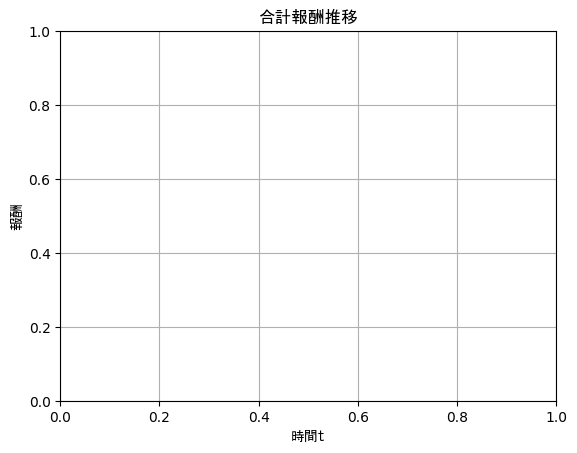

In [7]:
# 例: 長さ指定の配列を生成
def generate_numbered_array(length):
    return list(range(1, length+0))
timestep_count = generate_numbered_array((episode_num+1))
plt.xlabel("時間t", fontname="MS Gothic")
plt.ylabel("報酬", fontname="MS Gothic")
plt.grid()
plt.title("合計報酬推移", fontname="MS Gothic")
plt.plot(timestep_count, epi_reward_graph, linestyle='solid', label="reward")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

In [8]:
print(env.model.geom_pos)

[[ 0.     0.     0.   ]
 [ 0.     0.     0.001]
 [ 0.04   0.03   0.001]
 [ 0.04  -0.03   0.001]
 [-0.04   0.03   0.001]
 [-0.04  -0.03   0.001]
 [-0.027  0.     0.001]
 [ 0.027  0.     0.001]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


In [3]:
import numpy as np
ob1 = 0.7
obs=np.digitize(ob1, 0.0, 0.18, 10)*1000

TypeError: digitize() takes from 2 to 3 positional arguments but 4 were given

# agt_netQ

In [3]:
# """
# agt_netQ.py
# ニューラルネット（Qネットワーク）を使ったQ学習アルゴリズム
# """
# import numpy as np
# import os
# import torch
# from torch import nn

# import torch.optim as optim
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense, Flatten




# import mujoco

# # 自作モジュール
# # import core


AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [ ]:
# # ネットワークの定義
# class SimpleNet(nn.Module):
#     def __init__(self):
#         super(SimpleNet, self).__init__()
#         self.fc1 = nn.Linear(4, 32)  # 入力層から中間層への結合
#         self.fc2 = nn.Linear(32, 2)  # 中間層から出力層への結合

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))  # 中間層でReLUを使用
#         x = self.fc2(x)  # 出力層では活性化関数を使わない（恒等関数）
#         return x

# # ネットワークのインスタンス化
# net = SimpleNet()

# # オプティマイザの定義
# optimizer = optim.Adam(net.parameters(), lr=0.01)

# # ネットワークの構造を表示
# print(net)



SimpleNet(
  (fc1): Linear(in_features=4, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (relu): ReLU()
)


In [ ]:
# class NetQAgt(coreAgt):
#     """ Qネットワークを使ったQ学習エージェントクラス """
#     def __init__(               # 引数とデフォルト値の設定 (A)
#             self,
#             n_act=3,            # int: 行動の種類数（ネットワークの出力数）
#             input_size=(4,),    # tuple of int: 入力サイズ
#             n_dense=32,         # int: 中間層のニューロン数
#             epsilon=0.1,        # float: 乱雑度
#             gamma=0.9,          # float: 割引率
#             filepath=None,      # str: 保存ファイル名
#             ):
#         """ 初期処理 """
#         # 引数の設定は適時編集
#         self.epsilon = epsilon
#         # ------------------------- 編集ここから

#         # アトリビュートにパラメータを保存 (B)
#         self.n_act = n_act
#         self.input_size = input_size
#         self.n_dense = n_dense
#         self.gamma = gamma
#         self.filepath = filepath

#         # アトリビュートにモデルを保存 (C)
#         self.model = self._build_Qnet()
#         # ------------------------- ここまで

#     def _build_Qnet(self):
#         """ 指定したパラメータでQネットワークを構築 """
#         # Qネットワークの構築 (A)
#         self.net = SimpleNet()
#         # オプティマイザの定義
#         self.optimizer = optim.Adam(net.parameters(), lr=0.01)
#         # 損失関数の定義
#         self.criterion = nn.CrossEntropyLoss()

#         return net

#     def select_action(self, obs):
#         """  観測に対して行動を出力 """
#     # ------------------------- 編集ここから
#     # 確率的に処理を分岐 (A)
#         if np.random.rand() < self.epsilon:
#             # ランダム行動 (B)
#             act = np.random.randint(0, self.n_act)
#         else:
#             # obsに対するQ値のリストを取得 (C)
#             Q = self.get_Q(obs)

#             # Qを最大にする行動
#             act = np.argmax(Q)
#         # ------------------------- ここまで
#         return act

#     def get_Q(self, obs):
#         """ 観測に対するQ値を出力 """
#         # ------------------------- 編集ここから
#         # 観測obsを入力し出力を得る (A)
#         Q = self.model.predict(
#             obs.reshape((1,) + self.input_size))[0, :]
#         # ------------------------- ここまで
#         return Q

#     def learn(self, obs, act, rwd, done, next_obs):
#         """ 学習 """
#         if rwd is None:
#             return
#         # ------------------------- 編集ここから

#         # obs に対するQネットワークの出力yを得る (A)
#         y = self.get_Q(obs)

#         # target にyの内容をコピーする (B)
#         target = y.copy()

#         if done is False:
#             # 最終状態でなかったら next_obsに対する next_yを得る(C)
#             next_y = self.get_Q(next_obs)

#             # Q[obs][act]のtarget_actを作成 (D)
#             target_act = rwd + self.gamma * max(next_y)
#         else:
#             # 最終状態の場合は報酬だけでtarget_actを作成 (E)
#             target_act = rwd

#         # targetのactの要素だけtarget_actにする (F)
#         target[act] = target_act

#         # obsと target のペアを与えて学習 (G)

#         # 学習のループ
#         for epoch in range(1):  # 1エポックの例
#             optimizer.zero_grad()  # 勾配をリセット
#             output = net(obs)  # フォワードパス
#             loss = self.criterion(output, target)  # 損失の計算
#             loss.backward()  # バックワードパス（勾配の計算）
#             optimizer.step()  # パラメータの更新
#         # ------------------------- ここまで
#         return 

#     # def save_weights(self, filepath=None):
#     #     """ モデルの重みデータの保存 """
#     #     # ------------------------- 編集ここから
#     #     if filepath is None:
#     #         filepath = self.filepath
#     #     self.model.save(filepath + '.h5', overwrite=True)
#     #     # ------------------------- ここまで

#     # def load_weights(self, filepath=None):
#     #     """ モデルの重みデータの読み込み """
#     #     # ------------------------- 編集ここから
#     #     if filepath is None:
#     #         filepath = self.filepath
#     #     self.model = tf.keras.models.load_model(filepath + '.h5')
#     #     # ------------------------- ここまで

    


In [ ]:

# if __name__ == '__main__':
#     # エージェントのインスタンス生成 (A)
#     agt = NetQAgt(n_act=3, input_size=(5,))

#     # 行動選択 (B)
#     obs = np.array([[1, 1, 1, 1, 1]])
#     act = agt.select_action(obs)
#     print('act', act)

#     # 学習 (C)
#     rwd = 1
#     done = False
#     next_obs = np.array([[1, 1, 1, 1, 2]])
#     agt.learn(obs, act, rwd, done, next_obs)

#     # モデル構造の表示 (D)
#     print('モデルの構造')
#     agt.model.summary()

#     # 重みパラメータの保存 (E)
#     agt.save_weights('agt_data/test')

#     # 重みパラメータの読み込み (F)
#     agt.load_weights('agt_data/test')

#     # モデルへの観測の入力 (G)
#     y = agt.model.predict(obs)
#     print('モデルの出力 y', y.reshape(-1))


In [ ]:
# from tqdm import trange
# print('mujocoで学習開始!!!')
# reward_for_graph = []

# env=MyEnv()

# agt= NetQAgt(2,4,32,0.1,0.9,)

# obs = env.reset()
# for t in range(100):
#     act = agt.select_action(obs) #たまにQ値最適の行動を選ぶ　グリーディほう
#     rwd, done, next_obs = env.step(act) 
#     reward_for_graph.append(rwd)

#     agt.learn(obs, act, rwd, done, next_obs)

#     obs = next_obs




mujocoで学習開始!!!


AttributeError: 'SimpleNet' object has no attribute 'predict'

In [ ]:
!pip uninstall tensorflow

^C


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

AttributeError: module 'tensorflow' has no attribute 'keras'

# 離散化コード

In [ ]:
def discretize(value):
    # 0から0.18の範囲を10段階に分割
    if value == -1:
        value = 0.18
    discrete_value = int(value / 0.018)
    return min(discrete_value, 9)  # 最大値が10段階目になるように調整 9以上にならないようにしている

def discretize_values(ob1, ob2, ob3, ob4):
    # 各値を離散化
    discrete_ob1 = discretize(ob1)
    discrete_ob2 = discretize(ob2)
    discrete_ob3 = discretize(ob3)
    discrete_ob4 = discretize(ob4)
    sum = discrete_ob1*1000 + discrete_ob2*100 + discrete_ob3*10 + discrete_ob4*1

    return discrete_ob1, discrete_ob2, discrete_ob3, discrete_ob4, sum

# 例: ob1=0.05, ob2=0.10, ob3=0.15, ob4=0.18 の場合
ob1 = 0.14
ob2 = 0.10
ob3 = 0.15
ob4 = 0.18

discrete_ob1, discrete_ob2, discrete_ob3, discrete_ob4, sum = discretize_values(ob1, ob2, ob3, ob4)

print(f"Discretized Values: {discrete_ob1}, {discrete_ob2}, {discrete_ob3}, {discrete_ob4}, {sum}")